The aim of this practical is to practice using Python in a tree model.

::: {.content-hidden when-profile="solutions"}
Click on the following to open this file in Google Colab:

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/aletroux/comp-finance-python/blob/main/practicals/2_tree_models_prac.ipynb)

:::

# First things first

This section contains a few short exercises to practice working in Colab with Python. It is important to work through these exercises to define the variables that we will use later on.

## Variables

We are going to create a Cox-Ross-Rubinstein tree with $N=4$ steps, and parameter values $\Delta t=0.5$, $S_0=100$, $u=1.1$, $d=0.9$ and $r=0.05$. 

::: {#exr-variables}
The following cell defines the variable `N`. Edit it to create the variables `dt`, `S0`, `u`, `d` and `r`. Then run the cell to define the variables.
:::

In [1]:
# Number of steps
N = 4

::: {.content-visible when-profile="solutions"}
::: {#sol-variables}

In [2]:
# Number of steps
N = 4

# Step size
dt = 0.5

# Initial stock price
S0 = 100

# "up" jump
u = 1.1

# "down" jump
d = 0.9

# interest rate
r = 0.05

:::
:::

## Formulae

At each time step there are two possibilities for the stock price under the risk-neutral probability:
$$ S_{n+1} = 
\begin{cases}
u S_n & \text{ with probability }q,\\
d S_n & \text{ with probability }1-q,
\end{cases}$$
where
$$q = \frac{e^{r\Delta t} - d}{u-d}.$$

::: {#exr-formulae}

Use the following code cell to calculate the value of $q$. 

The value of $e^{rt}$ has been calculated for you already, using the `math` package. @PSFmath provides more info about this package, which contains many useful mathematical functions and constants.
:::

In [3]:
import math

value = math.exp(r*dt)

# insert your code here

::: {.content-visible when-profile="solutions"}
::: {#sol-formulae}

In [4]:
import math

value = math.exp(r*dt)

# Risk-neutral probability
q = (value-d)/(u-d)

:::
:::

## Booleans and `if` statements

The model is free of arbitrage if and only if $q$ is a real probability, in other words, $0 < q < 1$.

::: {#exr-if-statement}
The code in the following cell checks whether $q<1$, and displays a message when it is not.

Modify the code so that it also tests whether $q>0$, and displays a relevant message based on whether $0<q<1$ or not. Test your code for different values of $q$.
:::

In [5]:
#| eval: false
if q < 1:
    print ("good news, q < 1")
else:
    print(f"we need q < 1, but q = {q}.")

good news, q < 1


::: {.content-visible when-profile="solutions"}
::: {#sol-if-statement}
There are different ways to approach this. Here are two possibilities:

In [6]:
if 0 < q < 1:
    print ("good news, 0 < q < 1")
else:
    print(f"we need 0 < q < 1, but q = {q}.")

good news, 0 < q < 1


In [7]:
if 0 < q and q < 1:
    print ("good news, q < 1")
else:
    print(f"we need q < 1, but q = {q}.")

good news, q < 1


:::
:::

## `for` loops

Let us start by calculating the value $$B_n = e^{n r \Delta t}$$ of the money market account at all time steps $n=0,1,2,3,4$. For this we need a few things:

- The exponential function. As the `math` package was imported above, we don't need to import it again in this notebook.
- A loop to repeatedly calculate $B_n$ for different values of $n$. There are 5 possibilities for $n$, and so the object `range(5)` may be useful.
- Somewhere to store these values. We will use a list. The list is initially empty, and then each value of $B_n$ is added at the end.

The code follows below. There are two loops: one loop creates the list of values, and the other runs through the list to display the data.

In [8]:
#Money market account
B = []

#Create money market account values
for n in range(5):
    Bn = math.exp(r*n*dt)
    B.append(Bn)

#Display money market account values
for n in range(5):
    print(f"B[{n}] = {B[n]}")

B[0] = 1.0
B[1] = 1.0253151205244289
B[2] = 1.0512710963760241
B[3] = 1.0778841508846315
B[4] = 1.1051709180756477


Let us now calculate the different possible values $$S_N = S_0 u^n d^{N-n}$$ of the stock price $S_N$ at time step $N$. Here there are $N+1=5$ possibilities, so again $n=0,1,2,3,4$.

For this we need a few things:

- Knowing how to raise a number to a power. It's `**` in Python rather than `^`.
- A loop to repeatedly calculate the formulae for the different values for $S_N$.
- Somewhere to store these values. Let us use a list again.

::: {#exr-variables}
Use the code cell below to create a list `SN` where the value $S_0 u^n d^{N-n}$ is stored in `S[n]` for all `n`.

Then display the contents of the list `SN` in decreasing order of magnitude
:::

In [9]:
# Insert your code here

::: {.content-visible when-profile="solutions"}
::: {#sol-loops}

In [10]:
#Stock price values at time step N
SN = []
for n in range(5):
    Sn = S0 * u**n * d**(N-n)
    SN.append(Sn)

#Display stock prices in increasing order
print("Stock prices in increasing order:")
for n in range(5):
    print(f"SN[{n}] = {round(SN[n],2)}")

#Display stock prices in decreasing order
print("\nStock prices in decreasing order:")
for n in range(4, -1, -1):
    print(f"SN[{n}] = {round(SN[n],2)}")

Stock prices in increasing order:
SN[0] = 65.61
SN[1] = 80.19
SN[2] = 98.01
SN[3] = 119.79
SN[4] = 146.41

Stock prices in decreasing order:
SN[4] = 146.41
SN[3] = 119.79
SN[2] = 98.01
SN[1] = 80.19
SN[0] = 65.61


:::
:::

## Functions

We will be calculating the prices of derivative securities in the tree model. Every derivative security has one or more maturity dates (it will be $N$ in our model) and a **payoff**, which can often (but not always) be expressed as a function of the stock price. For example, the payoff of a put option with pre-agreed strike price $K$ is
$$P = \max\{K-S,0\}$$
where $S$ is the stock price at the maturity date of the option.

This can be formulated as a Python function. Below we define the function `putpayoff` and plot it for a range of values.

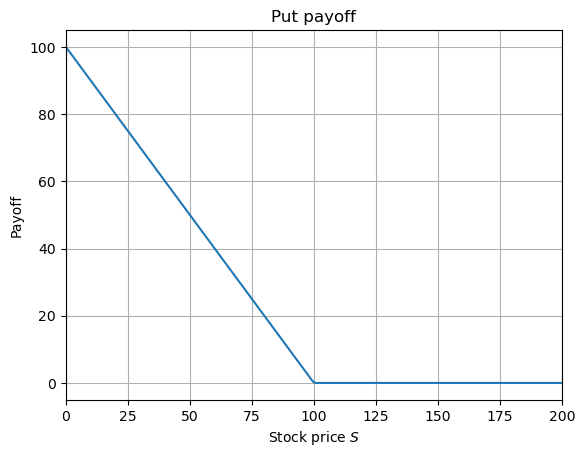

In [11]:
def putpayoff(S,K):
    """Put option payoff function. Arguments are
    S: Stock price
    K: Strike price"""
    return max(K-S,0)

# plot put payoff for strike K = 100
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

K = 100
x = np.linspace(0, 2*K, 200)

# np.vectorize function eliminates need to write a for loop when working with NumPy arrays
y = np.vectorize(putpayoff, otypes=[np.float64])(x,K)

ax.plot(x,y)
ax.set_title('Put payoff')
ax.xaxis.grid(True)
ax.yaxis.grid(True)
ax.set(xlabel='Stock price $S$', ylabel='Payoff', xlim=(0, 2*K))

plt.show(fig)

::: {#exr-functions}
Use the code cell below to create a payoff function `putpayoff` for the payoff of a call option, which is
$$P = \max\{S-K,0\}.$$
:::

In [12]:
#Insert your code here

::: {.content-visible when-profile="solutions"}
::: {#sol-functions}

In [13]:
def callpayoff(S,K):
    """Call option payoff function. Arguments:
    S: Stock price
    K: Strike price"""
    return max(S-K,0)

help(callpayoff)

Help on function callpayoff in module __main__:

callpayoff(S, K)
    Call option payoff function. Arguments:
    S: Stock price
    K: Strike price



:::
:::

# European option pricing with lists

Let $f$ be the payoff of a derivative security with maturity date $N$. Then the option pricing procedure generates a process $V_n$ starting from $n=N$, as follows:

1. Set $V_{N,k} = f(S_{N,k})$ where $k=0,\ldots,N$ and $S_{N,k} = S_0 u^k d^{N-k}$.

2. For $n = N-1, N-2, \ldots, 0$, set
$$ V_{n,k} = e^{-r\Delta t} \left(q V_{n+1,k+1} + (1-q)V_{n+1,k} \right) $$
for all $k=0,\ldots,n$.

3. Then the option price at time $0$ is $V_{0,0}$.

In order to implement this algorithm, we need a few things:

- Loops. Step 1 needs a single loop but there are two nested loops in step 2: an outer loop over `n` (backwards) and for each `n` an inner loop over `k`.
- Somewhere to store the intermediate values. Notice in step 2 that $V_{n,k}$ depends on $V_{n+1,k+1}$ and $V_{n+1,k}$. For now we will use lists to store the intermediate values as they are straightforward to use, and allow us to focus on some of the other programming aspects. NumPy arrays are, however, ideally suited to this, and in addition more efficient. They will be introduced in @sec-Eoptions-Numpy.
- Some values that have already been calculated, such as $S_{N,k}$ for all $k$ and the probability $q$.

The following code calculates the price of a put option with strike price $K=100$. Study it carefully to see how it works. Then run it for a few different values of `K`.

In [14]:
# Strike
K = 100

# Risk-neutral probability
q = (math.exp(r*dt) - d)/(u - d)

# This value will be used frequently.
discount = math.exp(-r*dt)

# Step 1: Calculate V_N
V = []
for k in range(N+1):
    S = S0*u**k*d**(N-k)
    V.append( putpayoff(S,K) ) 

# Step 2: Now iterate backwards
for n in range(N-1,-1,-1):
    # At each time step n there are two lists:
    # - oldV = V_{n+1}
    # - V = V_{n}
    oldV = V
    V = []
    
    for k in range(n+1):
        V.append(discount*(q*oldV[k+1] + (1-q)*oldV[k]))

# Step 3
print(f"Price of put option with strike {K} is {V[0]}")

Price of put option with strike 100 is 3.5359007954727515


The above code can be improved in a number of ways. For example, notice that $V_{n,k}$ depends only on $V_{n+1,k+1}$ and $V_{n+1,k}$, and so we can actually rewrite the code to use only one list `V` as long as we are careful not to overwrite any values before they are used. (Try this as an exercise!)

Also notice that the algorithm deletes the old (step $n+1$) values at each time step $n$. If we wanted to store these values, then we could use a nested list instead. Study the code below carefully to see how it works.

In [15]:
# Strike
K = 100

# Risk-neutral probability
q = (math.exp(r*dt) - d)/(u - d)

# This value will be used frequently.
discount = math.exp(-r*dt)

# Initialise nested list for V
# To start with, it's a list of N+1 empty lists
# Once the code finishes, V[n] will contain the values at time step n
V = [ [] for k in range(N+1)]

# Step 1: Calculate V_N
for k in range(N+1):
    S = S0*u**k*d**(N-k)
    V[N].append( putpayoff(S,K) ) 

# Step 2: Now iterate backwards
for n in range(N-1,-1,-1):
    for k in range(n+1):
        V[n].append(discount*(q*V[n+1][k+1] + (1-q)*V[n+1][k]))

# Step 3
print(f"Price of put option with strike {K} is {V[0][0]}")

#We can now display the entire tree of prices
print("\nTree of option prices:")
for k in range(N,-1,-1):
    linestring = ""
    for n in range(k):
        linestring += "        "
    for n in range(k,N+1):
        linestring += f"{V[n][k]:8.2f}"
    print(linestring)

Price of put option with strike 100 is 3.5359007954727515

Tree of option prices:
                                    0.00
                            0.00    0.00
                    0.26    0.72    1.99
            1.44    3.51    8.43   19.81
    3.54    7.29   14.12   24.63   34.39


The code works, but it uses the global variables `N`, `u`, `d`, `r`, `dt`, `S0` and only works for call options. If we now wanted to modify `N`, for example, then we need to scroll up in the notebook, find where we have defined `N` and then recompile the whole notebook (which is tedious), or redefine `N` in the current code cell (which is risky because other variables might depend on it). A neat solution to this is to write our code in terms of a function, which takes all the values it needs as arguments.

::: {#exr-pricecall}

Complete the following code cell to create a function `callprice` which calculates the price of a call.
:::

In [16]:
#| eval: false
def putprice (S0, N, u, r, d, dt, K):
    """Price a European put option in the Cox-Ross-Rubinstein model.
    Arguments:
    S0: initial price
    N: number of steps
    u: up jump, u > e^{r dt}
    r: continuously compounded interest rate
    d: down jump, d < e^{r dt}
    dt: size of time step
    K: strike of call option
    Output:
    Price of call at time 0."""

    #insert your code here
    #remember indentation
    #remember a return value

print ("The price of a put option with the parameters in the notebook is", 
       putprice(100, 4, 1.1, 0.05, 0.9, 0.5, 100))    

The price of a put option with the parameters in the notebook is None


::: {.content-visible when-profile="solutions"}
::: {#sol-pricecall}

In [17]:
def putprice (S0, N, u, r, d, dt, K):
    """Price a European put option in the Cox-Ross-Rubinstein model.
    Arguments:
    S0: initial price
    N: number of steps
    u: up jump, u > e^{r dt}
    r: continuously compounded interest rate
    d: down jump, d < e^{r dt}
    dt: size of time step
    K: strike of call option
    Output:
    Price of call at time 0."""

    # Risk-neutral probability
    q = (math.exp(r*dt) - d)/(u - d)
    
    # This value will be used frequently.
    discount = math.exp(-r*dt)
    
    # Initialise nested list for V
    V = [ [] for k in range(N+1)]
    
    # Step 1: Calculate V_N
    for k in range(N+1):
        S = S0*u**k*d**(N-k)
        V[N].append( putpayoff(S,K) ) 
    
    # Step 2: Now iterate backwards
    for n in range(N-1,-1,-1):
        for k in range(n+1):
            V[n].append(discount*(q*V[n+1][k+1] + (1-q)*V[n+1][k]))

    # Step 3
    return V[0][0]

print ("The price of a put option with the parameters in the notebook is", 
       putprice(100, 4, 1.1, 0.05, 0.9, 0.5, 100))    

The price of a put option with the parameters in the notebook is 3.5359007954727515


:::
:::

The function `putprice` can now be used to easily calculate prices for different values of the parameters. The following graph demonstrates this. (Notice that the graph isn't smooth; this is due to the fact that the model has only 4 steps, and hence there are only 5 possibilities for the payoff.)

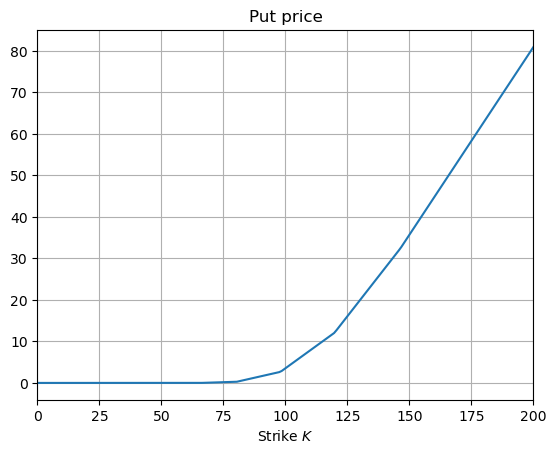

In [18]:
fig, ax = plt.subplots()

K = np.linspace(0, 200, 200)
y = np.vectorize(putprice, otypes=[np.float64])(100, 4, 1.1, 0.05, 0.9, 0.5, K)

ax.plot(K,y)
ax.set_title('Put price')
ax.xaxis.grid(True)
ax.yaxis.grid(True)
ax.set(xlabel='Strike $K$', xlim=(0, 200))

plt.show(fig)

The next step is to generalise the pricing procedure to derivatives that are not call options, for example, put options. To do this we need an argument representing the payoff function. This raises the question of the strike `K`: call and put options have a single strike parameter, but some derivatives (like bull and bear spreads) have two and others (like butterfly options) have more than two. To cater for all such eventualities, we remove the strike parameter and require it to be built into the payoff function. This is easily done by using a `lambda` function if needed. The result is something like the following.

In [19]:
def Eoptionprice_list (S0, N, u, r, d, dt, payoff):
    """Price a European option in the Cox-Ross-Rubinstein model.
    Arguments:
    S0: initial price
    N: number of steps
    u: up jump, u > e^{r dt}
    r: continuously compounded interest rate
    d: down jump, d < e^{r dt}
    dt: size of time step
    payoff: payoff function
    Output:
    Price of call at time 0."""

    # Risk-neutral probability
    q = (math.exp(r*dt) - d)/(u - d)
    
    # This value will be used frequently.
    discount = math.exp(-r*dt)
    
    # Initialise nested list for V
    V = [ [] for k in range(N+1)]
    
    # Step 1: Calculate V_N
    for k in range(N+1):
        S = S0*u**k*d**(N-k)
        V[N].append( payoff(S) ) 
    
    # Step 2: Now iterate backwards
    for n in range(N-1,-1,-1):
        for k in range(n+1):
            V[n].append(discount*(q*V[n+1][k+1] + (1-q)*V[n+1][k]))

    # Step 3
    return V[0][0]

# modify put option payoff so we can use it with new function
putpayoff100 = lambda x : putpayoff(x,100)

print ("The price of a put option with the parameters in the notebook is", 
       Eoptionprice_list(100, 4, 1.1, 0.05, 0.9, 0.5, putpayoff100))

# or, more briefly
print ("The price of a put option with the parameters in the notebook is", 
       Eoptionprice_list(100, 4, 1.1, 0.05, 0.9, 0.5, lambda x : putpayoff(x,100)))


The price of a put option with the parameters in the notebook is 3.5359007954727515
The price of a put option with the parameters in the notebook is 3.5359007954727515


::: {#exr-pricecall}
A butterfly spread with strikes 90, 100 and 110 has the following payoff function:
$$ B(S) = \max\{S - 90, 0\} - 2\max\{S - 100, 0\} + 2\max\{S - 100, 0\} $$
for all $S\ge 0$. Write a function `butterflypayoff` to represent the payoff of the butterfly option, and use the function `Eoptionprice_list` to calculate its price at time 0.
:::

In [20]:
# Insert code here

::: {.content-visible when-profile="solutions"}
::: {#sol-pricecall}

In [21]:
def butterflypayoff (S):
    """Payoff of butterfly option with strikes 90, 100 and 110."""
    C1 = max(S-90,0)
    C2 = max(S-100,0)
    C3 = max(S-110,0)
    return C1 - 2*C2 + C3

print ("The price of a butterfly option with the parameters in the notebook is", 
       Eoptionprice_list(100, 4, 1.1, 0.05, 0.9, 0.5, butterflypayoff))

The price of a butterfly option with the parameters in the notebook is 2.3807108807929973


:::
:::

# European option pricing with NumPy {#sec-Eoptions-Numpy}

Programming with NumPy is very similar to working with lists, but there are a few differences:

- Whilst multi-dimensionality can be achieved with nested lists, NumPy is more flexible, which means we can use different notation if we want to.
- NumPy is very efficient, much faster than using Python `for` loops, and therefore we should make use of NumPy features to replace loops whereever we can.

Numpy code can be very elegant and short. For example, the following code calculates the array of bond prices.

In [22]:
import numpy as np

#array of equispaced time steps
times = np.linspace(0, N*dt, N+1)

#array of bond prices, using the universal function np.exp 
B = np.exp(r*times)
print(B)

[1.         1.02531512 1.0512711  1.07788415 1.10517092]


Converting our European pricing procedure to use NumPy results in the following new function. Study the code carefully to see how it works.

In [23]:
def Eoptionprice (S0, N, u, r, d, dt, payoff):
    """Price a European option in the Cox-Ross-Rubinstein model.
    Arguments:
    S0: initial price
    N: number of steps
    u: up jump, u > e^{r dt}
    r: continuously compounded interest rate
    d: down jump, d < e^{r dt}
    dt: size of time step
    payoff: payoff function
    Output:
    Price of call at time 0."""

    # Risk-neutral probability
    q = (math.exp(r*dt) - d)/(u - d)
    
    # This value will be used frequently.
    # Calculate it with math.exp rather than np.exp as it is faster on scalars.
    discount = math.exp(-r*dt)
        
    # Initialise two-dimensional array V.
    # Initial values equal to 0 (but could also have used empty).
    # V[n, k] = node k at time step n.
    # remember this is a matrix but only half of the positions are used
    V = np.zeros((N+1,N+1))
    
    # Step 1: Calculate V_N
    ks = np.arange(N+1)
    # ks[::-1] is just a reversed view of ks
    S = S0 * u**ks * d**ks[::-1]
    V[N] = np.vectorize(payoff, otypes=[np.float64])(S)
    
    # Step 2: Now iterate backwards
    # cannot replace this loop
    for n in np.arange(N-1,-1,-1):
        # loop replaced by NumPy operations
        # notice selection of sub-arrays in the calculation
        V[n, :n+1] = discount*(q*V[n+1, 1:n+2] + (1-q)*V[n+1, :n+1])

    # Step 3
    return V[0, 0]

Let us compare the speed of the two methods for pricing European options.

In [24]:
#| output: true
%timeit Eoptionprice_list (100, 4, 1.1, 0.05, 0.9, 0.5, putpayoff100)
%timeit Eoptionprice (100, 4, 1.1, 0.05, 0.9, 0.5, putpayoff100)

3.39 µs ± 29.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
34 µs ± 214 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Notice that the NumPy version is significantly slower than the version with lists. The reason for this is that NumPy comes with overhead cost (for allocating memory, etc), which can take up a significant proportion of the running time when the amount of data is small. In this case we have 4 time steps, which mean 15 nodes. On the other hand, the code for a model with 200 time steps (i.e. 20301 nodes) shows a significant speedup over the version with lists. Try the following with a few different values. (Be warned, it does take a while to run!)

In [25]:
#| output: true
bigN = 200

%timeit Eoptionprice_list (100, bigN, 1.1, 0.05, 0.9, 0.5, putpayoff100)
%timeit Eoptionprice (100, bigN, 1.1, 0.05, 0.9, 0.5, putpayoff100)

2.01 ms ± 6.89 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.02 ms ± 2.24 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Assignment 1 builds on the work you have done so far, so you can start working on it now.

# American option pricing

An American style derivative can be exercised at any time up to the maturity date. When the option is exercised, the holder receives a payoff. The American option pricing procedure is as follows.

1. Calculate $P_{n,k} = f(S_{n,k})$ for all $n=0,\ldots,N$ and $k=0,\ldots,N$, where $S_{n,k} = S_0 u^k d^{n-k}$.

2. Set $V_{N,k} = P_{N,k}$ for all $k=0,\ldots,N$.

3. For $n = N-1, N-2, \ldots, 0$, set
$$ V_{n,k} = \max\left\{P_{n,k}, e^{-r\Delta t} \left(q V_{n+1,k+1} + (1-q)V_{n+1,k} \right)\right\} $$
for all $k=0,\ldots,n$.

5. The option price at time $0$ is $V_{0,0}$.

::: {#exr-American}

Read more about `np.maximize()` in the NumPy documentation (@NumPyReference).

Then modify the function `Eoptionprice` to create a new function `Aoptionprice` in the following code block that calculates the price of an American option. For the given parameter values, the price of a European and American call should be the same---use this fact to test your function.
:::

In [26]:
def Aoptionprice (S0, N, u, r, d, dt, payoff):
    """Price an American option in the Cox-Ross-Rubinstein model.
    Arguments:
    S0: initial price
    N: number of steps
    u: up jump, u > e^{r dt}
    r: continuously compounded interest rate
    d: down jump, d < e^{r dt}
    dt: size of time step
    payoff: payoff function
    Output:
    Vector of prices at all times and nodes."""

    # Risk-neutral probability
    q = (math.exp(r*dt) - d)/(u - d)
    
    # This value will be used frequently.
    # Calculate it with math.exp rather than np.exp as it is faster on scalars.
    discount = math.exp(-r*dt)
        
    # Initialise two-dimensional arrays P and V.
    # Initial values equal to 0 (but could also have used empty).
    # V[n, k] = node k at time step n.
    # remember this is a matrix but only half of the positions are used
    P = np.zeros((N+1,N+1))
    V = np.zeros((N+1,N+1))
    
    # Step 1: Calculate P
    # insert your code here

    # Step 2: Calculate V[N]
    # insert your code here
    
    # Step 3: Now iterate backwards
    # insert your code here

    # Step 4
    return V

# modify call option payoff so we can use it with Aoptionprice
callpayoff100 = lambda x : callpayoff(x,100)
print ("The price of a European call option with the parameters in the notebook is", 
       Eoptionprice(100, 4, 1.1, 0.05, 0.9, 0.5, callpayoff100))
print ("The price of an American call option with the parameters in the notebook is", 
       Aoptionprice(100, 4, 1.1, 0.05, 0.9, 0.5, callpayoff100)[0,0])

print ("The price of a European put option with the parameters in the notebook is", 
       Eoptionprice(100, 4, 1.1, 0.05, 0.9, 0.5, putpayoff100))
print ("The price of an American put option with the parameters in the notebook is", 
       Aoptionprice(100, 4, 1.1, 0.05, 0.9, 0.5, putpayoff100)[0,0])

The price of a European call option with the parameters in the notebook is 13.052158991876807
The price of an American call option with the parameters in the notebook is 0.0
The price of a European put option with the parameters in the notebook is 3.5359007954727515
The price of an American put option with the parameters in the notebook is 0.0




::: {.content-visible when-profile="solutions"}
::: {#sol-American}

In [27]:
def Aoptionprice (S0, N, u, r, d, dt, payoff):
    """Price an American option in the Cox-Ross-Rubinstein model.
    Arguments:
    S0: initial price
    N: number of steps
    u: up jump, u > e^{r dt}
    r: continuously compounded interest rate
    d: down jump, d < e^{r dt}
    dt: size of time step
    payoff: payoff function
    Output:
    Vector of prices at all times and nodes."""

    # Risk-neutral probability
    q = (math.exp(r*dt) - d)/(u - d)
    
    # This value will be used frequently.
    # Calculate it with math.exp rather than np.exp as it is faster on scalars.
    discount = math.exp(-r*dt)
        
    # Initialise two-dimensional arrays P and V.
    P = np.zeros((N+1,N+1))
    V = np.zeros((N+1,N+1))
    
    # Step 1: Calculate P
    vectorized_payoff = np.vectorize(payoff, otypes=[np.float64])
    for n in np.arange(N+1):
        ks = np.arange(n+1)
        S = S0 * u**ks * d**ks[::-1]
        P[n, :n+1] = vectorized_payoff(S)

    # Step 2: Calculate V[N]
    V[N] = P[N]
    
    # Step 3: Now iterate backwards
    for n in range(N-1,-1,-1):
        C = discount*(q*V[n+1, 1:n+2] + (1-q)*V[n+1, :n+1])
        V[n, :n+1] = np.maximum(C , P[n, :n+1])

    # Step 4
    return V

# modify call option payoff so we can use it with Aoptionprice
callpayoff100 = lambda x : callpayoff(x,100)
print ("The price of a European call option with the parameters in the notebook is", 
       Eoptionprice(100, 4, 1.1, 0.05, 0.9, 0.5, callpayoff100))
print ("The price of an American call option with the parameters in the notebook is", 
       Aoptionprice(100, 4, 1.1, 0.05, 0.9, 0.5, callpayoff100)[0,0])

print ("The price of a European put option with the parameters in the notebook is", 
       Eoptionprice(100, 4, 1.1, 0.05, 0.9, 0.5, putpayoff100))
print ("The price of an American put option with the parameters in the notebook is", 
       Aoptionprice(100, 4, 1.1, 0.05, 0.9, 0.5, putpayoff100)[0,0])

The price of a European call option with the parameters in the notebook is 13.052158991876807
The price of an American call option with the parameters in the notebook is 13.052158991876807
The price of a European put option with the parameters in the notebook is 3.5359007954727515
The price of an American put option with the parameters in the notebook is 4.722753680432218


:::
:::

# References {.unnumbered}